In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# IRIS example

iris_training.csv

120,4,setosa,versicolor,virginica
6.4,2.8,5.6,2.2,2
5.0,2.3,3.3,1.0,1
4.9,2.5,4.5,1.7,2
4.9,3.1,1.5,0.1,0
5.7,3.8,1.7,0.3,0

In [5]:
csv_filenamme = r"D:\hccho\CommonDataset\iris\iris_training.csv"
data = pd.read_csv(csv_filenamme,header=None,skiprows=1,names=['feaure1','feaure2','feaure3','features4','label'])
print(data.shape)
data.head(5)

(120, 5)


,feaure1,feaure2,feaure3,features4,label
0,6.4,2.8,5.6,2.2,2
1,5.0,2.3,3.3,1.0,1
2,4.9,2.5,4.5,1.7,2
3,4.9,3.1,1.5,0.1,0
4,5.7,3.8,1.7,0.3,0


   feaure1  feaure2  feaure3  features4  label
0      6.4      2.8      5.6        2.2      2
1      5.0      2.3      3.3        1.0      1
2      4.9      2.5      4.5        1.7      2
3      4.9      3.1      1.5        0.1      0
4      5.7      3.8      1.7        0.3      0
[0.92694536 0.05157993 0.01636179]


Text(0.5, 0, 'Principal Component 3')

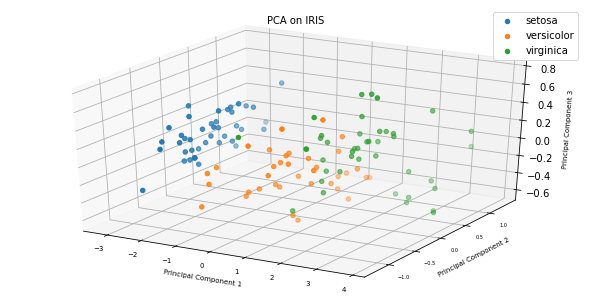

In [8]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA
labels=['setosa','versicolor','virginica']
csv_filenamme = r"D:\hccho\CommonDataset\iris\iris_training.csv"
data = pd.read_csv(csv_filenamme,header=None,skiprows=1,names=['feaure1','feaure2','feaure3','features4','label'])

print(data.head(5))

y = data['label'] # genre variable.
X = data.loc[:, data.columns != 'label'] #select all columns but not the labels


#### NORMALIZE X ####
cols = X.columns



#### PCA 3 COMPONENTS ####
pca = PCA(n_components=3)
principalComponents = pca.fit_transform(X)
principalDf = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2','principal component 3'])


# concatenate with target label
finalDf = pd.concat([principalDf, y], axis = 1)

print(pca.explained_variance_ratio_)

fig = plt.figure(figsize = (8, 4))
ax = Axes3D(fig)


for grp_name, grp_idx in finalDf.groupby('label').groups.items():
    y = finalDf.iloc[grp_idx,1]
    x = finalDf.iloc[grp_idx,0]
    z = finalDf.iloc[grp_idx,2]
    ax.scatter(x,y,z, label=labels[grp_name])  # this way you can control color/marker/size of each group freely
ax.legend()
plt.title('PCA on IRIS', fontsize = 10)
plt.xticks(fontsize = 7)
plt.yticks(fontsize = 5);
ax.set_xlabel("Principal Component 1", fontsize = 7)
ax.set_ylabel("Principal Component 2", fontsize = 7)
ax.set_zlabel("Principal Component 3", fontsize = 7)



# simaple example

In [ ]:
x1=np.array([ 1.41751313,  0.33904833,  0.29257167,  0.6478606 ,  0.90691377, 0.46082986,  0.10696884, -0.22016277, -0.01387787, -0.58088736])
x2=np.array([ 0.13784849, -0.05672081,  1.53048402,  0.6639671 ,  0.06636203,-1.09596719,  0.98829064, -0.68083318, -0.1207237 , -0.26187014])
x3 =['A','B','A','C','C','A','A','B','C','B']
data=pd.DataFrame(data=list(zip(x1,x2,x3)),columns=['age','weight','label'])

In [4]:
data.to_csv('xxx.csv',index=False)   # pd.read_csv

In [5]:
data.loc[data['label']=='A']

,age,weight,label
0,1.417513,0.137848,A
2,0.292572,1.530484,A
5,0.460830,-1.095967,A
6,0.106969,0.988291,A


In [6]:
data.groupby('label').mean()

,age,weight
label,,
A,0.569471,0.390164
B,-0.154001,-0.333141
C,0.513632,0.203202


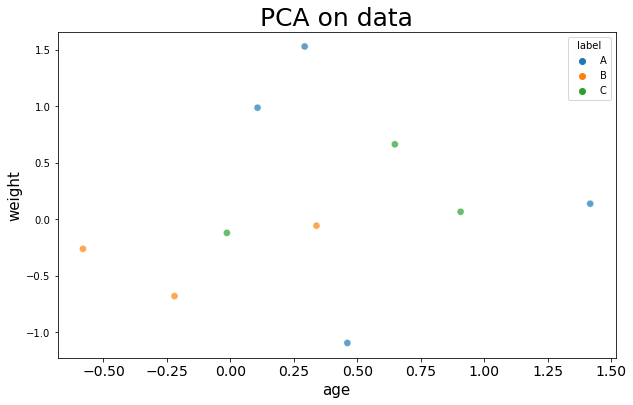

In [7]:
plt.figure(figsize = (10, 6))
sns.scatterplot(x = "age", y = "weight", data = data, hue = "label", alpha = 0.7, s = 50); # s=size

plt.title('PCA on data', fontsize = 25)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 10);
plt.xlabel("age", fontsize = 15)
plt.ylabel("weight", fontsize = 15)
plt.show()

In [8]:
data.values

array([[1.41751313, 0.13784849, 'A'],
       [0.33904833, -0.05672081, 'B'],
       [0.29257167, 1.53048402, 'A'],
       [0.6478606, 0.6639671, 'C'],
       [0.90691377, 0.06636203, 'C'],
       [0.46082986, -1.09596719, 'A'],
       [0.10696884, 0.98829064, 'A'],
       [-0.22016277, -0.68083318, 'B'],
       [-0.01387787, -0.1207237, 'C'],
       [-0.58088736, -0.26187014, 'B']], dtype=object)

In [9]:
data['age'].values

array([ 1.41751313,  0.33904833,  0.29257167,  0.6478606 ,  0.90691377,
        0.46082986,  0.10696884, -0.22016277, -0.01387787, -0.58088736])

In [10]:
data.sort_values(['label'],ascending=[True]) # data가 바뀌지는 않는다.  inplace=True 해야 바뀐다.

,age,weight,label
0,1.417513,0.137848,A
2,0.292572,1.530484,A
5,0.460830,-1.095967,A
6,0.106969,0.988291,A
1,0.339048,-0.056721,B
7,-0.220163,-0.680833,B
9,-0.580887,-0.261870,B
3,0.647861,0.663967,C
4,0.906914,0.066362,C
8,-0.013878,-0.120724,C


In [11]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('precision', 3)

In [12]:
data

,age,weight,label
0,1.418,0.138,A
1,0.339,-0.057,B
2,0.293,1.530,A
3,0.648,0.664,C
4,0.907,0.066,C
5,0.461,-1.096,A
6,0.107,0.988,A
7,-0.220,-0.681,B
8,-0.014,-0.121,C
9,-0.581,-0.262,B


In [13]:
# count()
data.groupby('label').count()


,age,weight
label,,
A,4,4
B,3,3
C,3,3


In [14]:
# column 1개인 경우.
# from collections import Counter    ---->   Counter(data['label'])  ---->  Counter({'A': 4, 'B': 3, 'C': 3})

data['label'].value_counts()

A    4
B    3
C    3
Name: label, dtype: int64